In [7]:
using Turing, Distributions
using PyPlot, PyCall

In [8]:
y = [ 1.0, 1.0, 1.0, 1.0, 2.0, 2.0, 2.0, 3.0, 3.0, 3.0, 2.0, 2.0, 2.0, 1.0, 1.0 ];
N = length(y);  K = 3;

In [ ]:
@model BayesHmm(y) = begin
    s = tzeros(Int64, N)
    m = tzeros(Real, K)
    T = Array{Array}(K)
    for i = 1:K
        T[i] ~ Dirichlet(ones(K)/K)
        # m[i] ~ Normal(1, 0.1) # Defining m this way causes label-switching problem.
        m[i] ~ Normal(i, 0.01)
    end
    s[1] ~ Categorical(ones(Float64, K)/K)
    for i = 2:N
        s[i] ~ Categorical(vec(T[s[i-1]]))
        y[i] ~ Normal(m[s[i]], 0.01)
    end
    return(s, m)
end

In [10]:
g = Gibbs(300, HMC(1, 0.2, 5, :m, :T), PG(50, 1, :s))
c = sample(BayesHmm(y), g);

[Turing]:  Assume - `T` is a parameter
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `m` is a parameter (ignoring `m` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Assume - `s` is a parameter (ignoring `s` found in global scope)
  in @~(::Any, ::Any) at compiler.jl:49
[Turing]:  Observe - `y` is an observation
  in @~(::Any, ::Any) at compiler.jl:28
[Gibbs] Finished with


In [11]:
describe(c)

Iterations = 1:300
Thinning interval = 1
Chains = 1
Samples per chain = 300

Empirical Posterior Estimates:
               Mean                      SD                          Naive SE                        MCSE                 ESS   
   s[9]      2.0000000×10⁰    0.0000000000000000000000000   0.00000000000000000000000000   0.000000000000000000000000 300.000000
   s[5]      2.0000000×10⁰    0.0000000000000000000000000   0.00000000000000000000000000   0.000000000000000000000000 300.000000
   m[1]   9.827730386×10⁻¹    0.0000000000000013344936422   0.00000000000000007704702635   0.000000000000000000000000 300.000000
   s[4]      3.0000000×10⁰    0.0000000000000000000000000   0.00000000000000000000000000   0.000000000000000000000000 300.000000
   s[8]      3.0000000×10⁰    0.0000000000000000000000000   0.00000000000000000000000000   0.000000000000000000000000 300.000000
T[2][1]   1.293263028×10⁻²    0.0000000000000000208514632   0.00000000000000000120385979   0.000000000000000000000000 

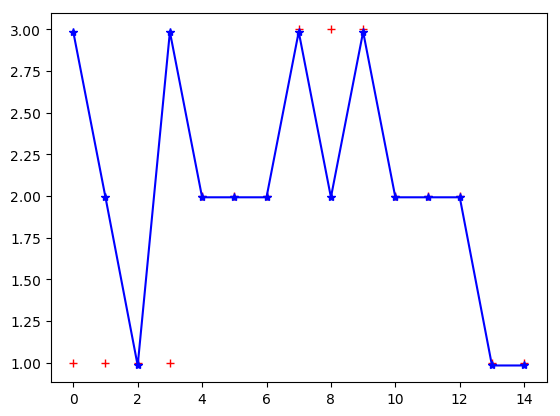

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x317695290>

In [12]:
m = c[:m][111];
s = c[:s][111];
PyPlot.plot(y, linestyle="None", marker="+", color = "r")
PyPlot.plot(m[s], linestyle="-", marker="*", color = "b")